In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load Data

UCI Heart-Disease Data

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* Targets:

0: Has Disease
1: No Disease

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
Targets:

0: Has Disease
1: No Disease

In [11]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Analysis

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [29]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


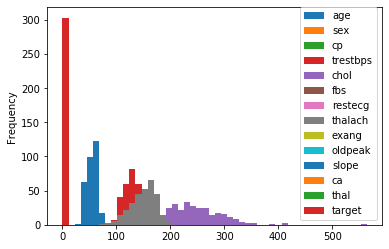

In [39]:
df.plot.hist(bins=50)

CNext we will look at how the variables correlate with each other using the corr() function.
It looks like that age, sysBP and prevalentHyp has strong positive correlation with TenYearCHD.

In [40]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


It looks like that cp and thalach has strong positive correlation with target

In [41]:
# drop values having NA
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
#To get the No of classes used in the data set.
#0-> Negetice, 1-> Positive

set(df.target)

{0, 1}

In [5]:
df.columns

Index(['Phrase', 'Sentiment'], dtype='object')

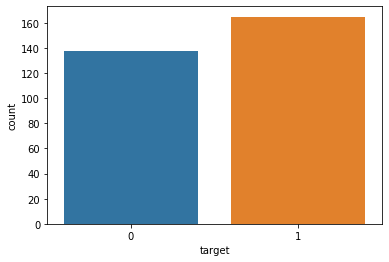

In [14]:
sns.countplot(x="target", data=df)


# Split dataset to train and test set 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(columns='target')
y = df['target']

In [17]:
print(len(X))

303


In [42]:
#Data split Test set 20% train set 80%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Fetching the splited dataset i.e given train and test data 
train_set = pd.read_csv('Heart_train.csv')
test_set = pd.read_csv('Heart_test.csv')
X_train = train_set.drop(columns='target')
y_train = train_set.target

X_test = test_set.drop(columns='target')
y_test = test_set.target

print(len(train_set))
print(len(test_set))


242
61


# Feature Extraction

In [45]:
cat_columns = ['cp', 'exang', 'slope', 'thal']
num_columns = [c for c in X_train.columns if c not in cat_columns]
num_columns

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'oldpeak',
 'ca']

# One-Hot Encoding train data
It automatically fetches all nominal categories from your train data and then encodes your test data according to the categories identified in the training step

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
#create an oneHotEncoder instance
# transform on training data
encoder=OneHotEncoder(handle_unknown='ignore')

#fit on categorical column
encoder.fit(X_train[cat_columns])

column_names=encoder.get_feature_names(input_features=cat_columns)

# transform on training data
X_train_cat_enc=encoder.transform(X_train[cat_columns])



X_train_cat_enc_df=pd.DataFrame(X_train_cat_enc.todense(),
                                    columns=column_names,
                                    index=X_train.index)
X_train_cat_enc_df

,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
238,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
239,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
240,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Encoded Training set

In [50]:
X_train_enc=pd.concat([X_train[num_columns],X_train_cat_enc_df],axis=1)
print(X_train_enc)

     age  sex  trestbps  chol  fbs  restecg  thalach  oldpeak  ca  cp_0  ...  \
0     67    1       152   212    0        0      150      0.8   0   0.0  ...   
1     53    1       130   246    1        0      173      0.0   3   0.0  ...   
2     61    1       134   234    0        1      145      2.6   2   0.0  ...   
3     45    1       128   308    0        0      170      0.0   0   0.0  ...   
4     50    1       144   200    0        0      126      0.9   0   1.0  ...   
..   ...  ...       ...   ...  ...      ...      ...      ...  ..   ...  ...   
237   46    1       150   231    0        1      147      3.6   0   0.0  ...   
238   58    1       128   216    0        0      131      2.2   3   1.0  ...   
239   52    1       125   212    0        1      168      1.0   2   1.0  ...   
240   54    1       120   188    0        1      113      1.4   1   1.0  ...   
241   55    0       132   342    0        1      166      1.2   0   0.0  ...   

     cp_3  exang_0  exang_1  slope_0  s

# One-Hot Encoding test data

In [52]:
# transform on testing data
X_test_cat_enc=encoder.transform(X_test[cat_columns])

X_test_cat_enc_df=pd.DataFrame(X_test_cat_enc.todense(),
                                    columns=column_names,
                                    index=X_test.index)
X_test_enc=pd.concat([X_test[num_columns], X_test_cat_enc_df],axis=1)
print(X_test_enc)

    age  sex  trestbps  chol  fbs  restecg  thalach  oldpeak  ca  cp_0  ...  \
0    58    1       120   284    0        0      160      1.8   0   0.0  ...   
1    52    1       112   230    0        1      160      0.0   1   1.0  ...   
2    42    0       120   209    0        1      173      0.0   0   0.0  ...   
3    55    1       130   262    0        1      155      0.0   0   0.0  ...   
4    53    0       130   264    0        0      143      0.4   0   1.0  ...   
..  ...  ...       ...   ...  ...      ...      ...      ...  ..   ...  ...   
56   55    0       128   205    0        2      130      2.0   1   1.0  ...   
57   58    1       114   318    0        2      140      4.4   3   1.0  ...   
58   58    1       125   300    0        0      171      0.0   2   1.0  ...   
59   43    1       115   303    0        1      181      1.2   0   1.0  ...   
60   66    1       160   228    0        0      138      2.3   0   1.0  ...   

    cp_3  exang_0  exang_1  slope_0  slope_1  slope

# Build Model

In [93]:
from sklearn.svm import SVC

In [94]:
def svm_model(X_train_v, y_train):
    model = SVC(random_state = 1)
    model.fit(X_train_v, y_train)
    return model


In [95]:
model= svm_model(X_train_enc, y_train) 
model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

# Model Evaluation

Now, will run the model on the train and test set using SVC( Support Vector Classifier) 
and then use the test set to see what kind of prediction results we get 
using the test data set for the Support Vector Machines as well as the Random Forest Model as well.

In [97]:
from sklearn.metrics import accuracy_score

preds=model.predict(X_test_enc)
accuracy_score(y_test, preds)

0.639344262295082

In [98]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50        28
           1       0.62      0.85      0.72        33

    accuracy                           0.64        61
   macro avg       0.65      0.62      0.61        61
weighted avg       0.65      0.64      0.62        61



# Model Selection

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
grid_param = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [85]:
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, average='micro')

In [86]:
scorer = make_scorer(f1_score, average='micro')
clf = GridSearchCV(SVC(), grid_param,scoring=scorer)
clf.fit(X_train_enc, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=micro), verbose=0)

In [87]:
print(clf.best_score_, clf.best_params_)

0.8142857142857143 {'C': 1, 'kernel': 'linear'}


# Final Model

In [88]:
#Going to train with best hyper parameter
final_model = SVC(random_state=1, kernel="linear", C=1.0)
final_model.fit(X_train_enc, y_train)
y_pred = final_model.predict(X_test_enc)
print(metrics.classification_report(y_test, y_pred))
#FInal result obtained

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [89]:
svm_scores = cross_val_score(model, X_train_enc, y_train, cv=10)
svm_scores.mean()

0.8223333333333335

# RANDOM FOREST 

In [90]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators = 100,
                                    random_state = 42)
forest_scores = cross_val_score(forest_clf, X_train_enc, 
                                y_train, cv=10)
forest_scores.mean()

0.826

As we can see that the Random Forests model is slightly better
than that of the SVM Model and below graphically as well.


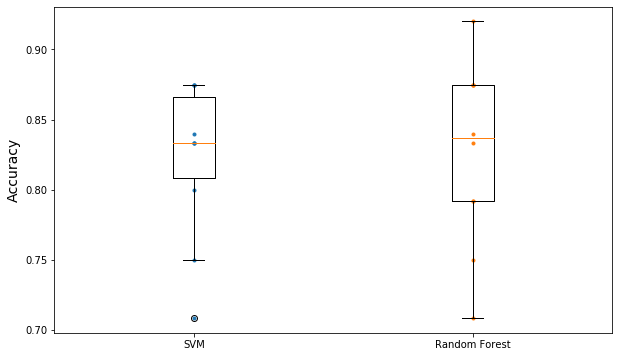

In [92]:
plt.figure(figsize=(10,6))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM", 
                                                 "Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()